In [35]:
import pandas as pd

In [1]:
# Import TensorFlow and load MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the data (train and test sets)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2025-11-12 02:55:32.565818: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 02:55:50.019373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 02:56:00.160502: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [17]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

np.uint8(5)

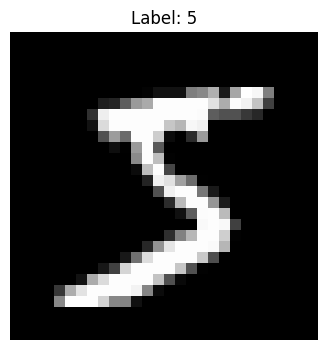

In [18]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

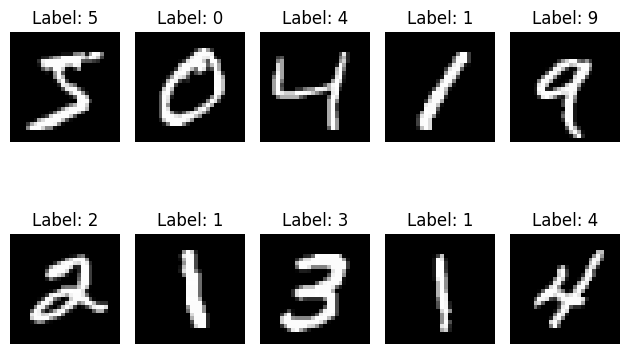

In [19]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()

In [20]:
X_train=tf.constant(X_train, dtype=tf.float32)/255.0
X_test=tf.constant(X_test, dtype=tf.float32)/255.0
y_train=tf.constant(y_train, dtype=tf.int32)
y_test=tf.constant(y_test, dtype=tf.int32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

2025-11-12 03:34:28.398519: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-11-12 03:34:28.519304: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-11-12 03:34:28.693041: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.
2025-11-12 03:34:28.749735: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.
2025-11-12 03:34:28.766830: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


(TensorShape([60000, 28, 28]),
 TensorShape([10000, 28, 28]),
 TensorShape([60000]),
 TensorShape([10000]))

In [ ]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model1.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=6000)

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7790 - loss: 0.8117 - val_accuracy: 0.8877 - val_loss: 0.3847
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.3517 - val_accuracy: 0.9104 - val_loss: 0.3104
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9160 - loss: 0.2960 - val_accuracy: 0.9219 - val_loss: 0.2704
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9259 - loss: 0.2607 - val_accuracy: 0.9298 - val_loss: 0.2426
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9332 - loss: 0.2352 - val_accuracy: 0.9372 - val_loss: 0.2230


In [68]:
model1.evaluate(X_test, y_test)

 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9322 - loss: 0.2403

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9372 - loss: 0.2230


[0.22298210859298706, 0.9372000098228455]

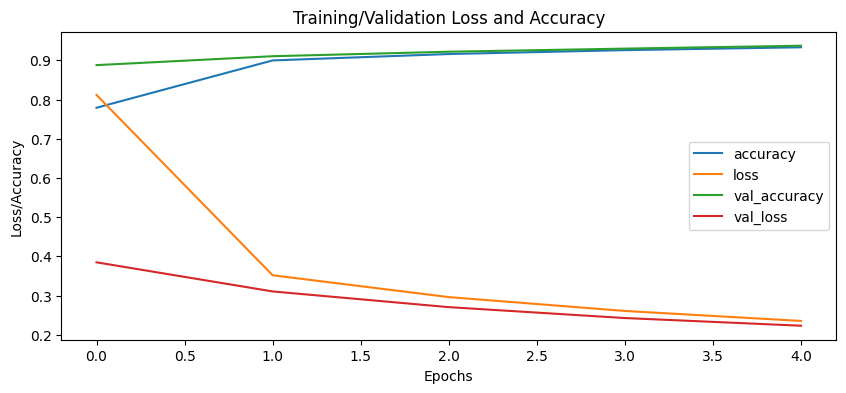

In [69]:
pd.DataFrame(model1.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()

In [73]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7227 - loss: 0.8980 - val_accuracy: 0.8856 - val_loss: 0.3906
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9080 - loss: 0.3158 - val_accuracy: 0.9254 - val_loss: 0.2558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9307 - loss: 0.2349 - val_accuracy: 0.9385 - val_loss: 0.2092
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9420 - loss: 0.1970 - val_accuracy: 0.9441 - val_loss: 0.1865
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9495 - loss: 0.1725 - val_accuracy: 0.9501 - val_loss: 0.1668


In [75]:
model2.evaluate(X_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0394

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.1668  


[0.16679739952087402, 0.9501000046730042]

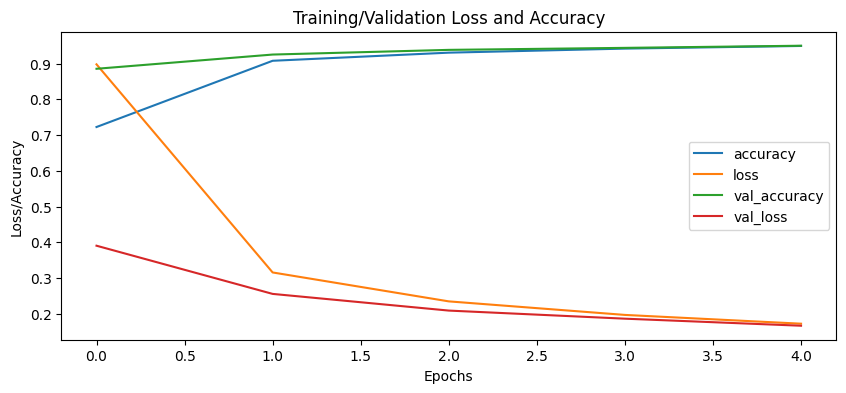

In [76]:
pd.DataFrame(model2.history.history).plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training/Validation Loss and Accuracy')
plt.show()